In [2]:
from jobflow import job, Flow

In [3]:
from pyiron_base import Project

In [4]:
from python_workflow_definition.jobflow import write_workflow_json

In [5]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [6]:
from simple_workflow import (
    add_x_and_y as _add_x_and_y, 
    add_x_and_y_and_z as _add_x_and_y_and_z,
)

In [ ]:
workflow_json_filename = "workflow_simple_jobflow.json"

In [7]:
add_x_and_y = job(_add_x_and_y, data=["x", "y", "z"])
add_x_and_y_and_z = job(_add_x_and_y_and_z)

In [8]:
obj = add_x_and_y(x=1, y=2)

In [9]:
w = add_x_and_y_and_z(x=obj.output.x, y=obj.output.y, z=obj.output.z)

In [10]:
flow = Flow([obj, w])

In [ ]:
write_workflow_json(flow=flow, file_name=workflow_json_filename)

In [ ]:
!cat {workflow_json_filename}

{"nodes": {"0": "simple_workflow.add_x_and_y", "1": "simple_workflow.add_x_and_y_and_z", "2": 1, "3": 2}, "edges": [{"target": 0, "targetHandle": "x", "source": 2, "sourceHandle": null}, {"target": 0, "targetHandle": "y", "source": 3, "sourceHandle": null}, {"target": 1, "targetHandle": "x", "source": 0, "sourceHandle": "x"}, {"target": 1, "targetHandle": "y", "source": 0, "sourceHandle": "y"}, {"target": 1, "targetHandle": "z", "source": 0, "sourceHandle": "z"}]}

In [13]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

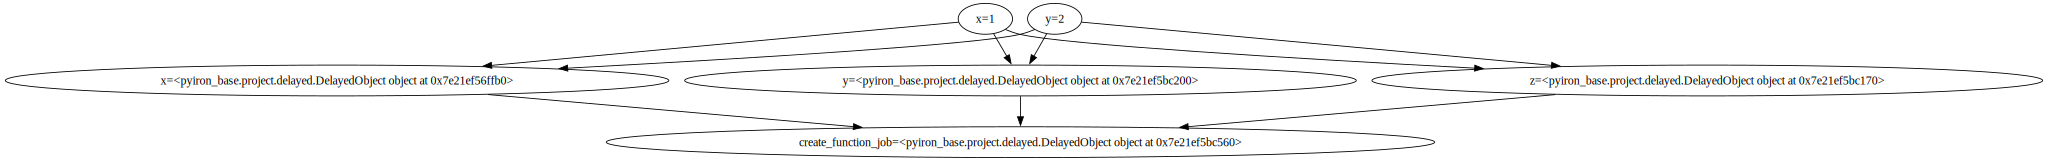

In [ ]:
delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [15]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 1
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 2


6